In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage  
import scipy.cluster.hierarchy as shc

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering


In [2]:
X = np.array([[5,3],  
                [10,15],
                [15,12],
                [24,10],
                [30,30],
                [85,70],
                [71,80],
                [60,78],
                [70,55],
                [80,91]
             ])

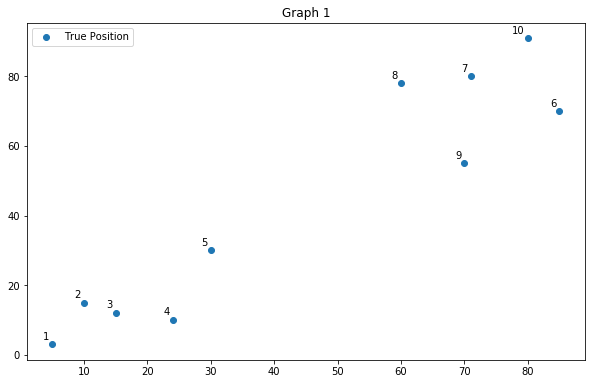

In [3]:
labels = range(1, 11)  

plt.figure(figsize=(10, 6))  
plt.subplots_adjust(bottom=0.1)  

plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(label,        
                 xy=(x, y), 
                 xytext=(-3, 3),
                 textcoords='offset points', 
                 ha='right', 
                 va='bottom')

plt.title('Graph 1')
plt.legend()
plt.show()  

It can be seen that the data points form 2 clusters: first at the bottom left consisting of points 1-5 while second at the top right consisting of points 6-10.

#### Hierarchical Clustering via Scipy

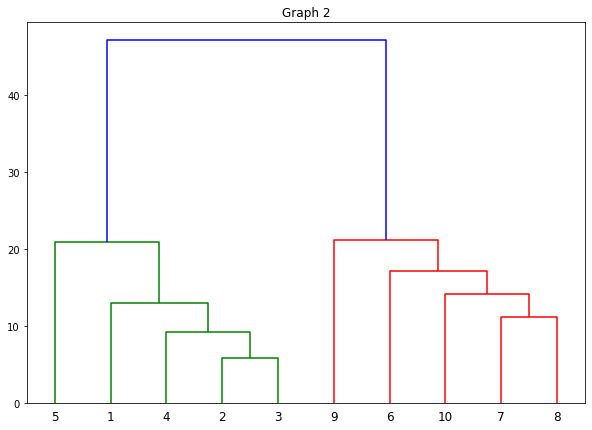

In [4]:
linked    = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7)) 

dendrogram(linked,  
           orientation='top',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Graph 2')
plt.show()  

In [5]:
# The algorithm starts by finding the two points that are closest to each other 
# on the basis of Euclidean distance. 

# we can see that points 2 and 3 are closest to each other while points 7 and 8 are closest 
# to each other. 

# Therefore a cluster will be formed between these two points first. 

# you can see that the dendograms have been created joining points 2 with 3, 
# and 8 with 7. 

# The vertical height of the dendogram shows the Euclidean distances between points. 

# From Graph2, it can be seen that Euclidean distance between points 8 and 7 is greater than 
# the distance between point 2 and 3.

# The next step is to join the cluster formed by joining two points to the next nearest cluster 
# or point which in turn results in another cluster. If you look at Graph1, point 4 is closest 
# to cluster of point 2 and 3, therefore in Graph2 dendrogram is generated by joining point 4 
# with dendrogram of point 2 and 3. 

# This process continues until all the points are joined together to form one big cluster.

# Once one big cluster is formed, the longest vertical distance without any horizontal line 
# passing through it is selected and a horizontal line is drawn through it. 

# The number of vertical lines this newly created horizontal line passes is equal to number 
# of clusters.

In [6]:
# We can see that the largest vertical distance without any horizontal line passing through 
# it is represented by blue line. So we draw a new horizontal red line that passes through 
# the blue line. Since it crosses the blue line at two points, therefore the number of clusters 
# will be 2.

#### Hierarchical Clustering via Scikit-Learn

In [5]:
X = np.array([[5,3],  
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [6]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

cluster.fit_predict(X)  

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
print(cluster.labels_)  

[1 1 1 1 1 0 0 0 0 0]


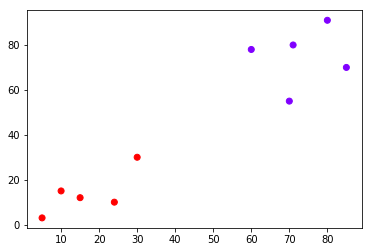

In [8]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')  

In [9]:
customer_data = pd.read_csv(r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\shopping_data.csv')  

In [10]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# retain only two of these five columns. 

# We can remove CustomerID column, Genre, and Age column. 

# We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. 

# The Spending Score column signifies how often a person spends money in a mall on a scale of 
# 1 to 100 with 100 being the highest spender.

In [11]:
data = customer_data.iloc[:, 3:5].values  

In [15]:
# we need to know the clusters that we want our data to be split to. 

# We will again use the scipy library to create the dendrograms for our dataset.

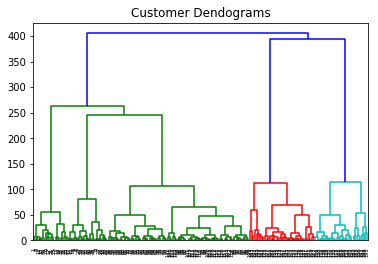

In [12]:

# The hierarchy class has a dendrogram method which takes the value returned by the 
# linkage method of the same class. The linkage method takes the dataset and the method to 
# minimize distances as parameters. We use 'ward' as the method since it minimizes then 
# variants of distances between the clusters.
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [17]:
# if we draw a horizontal line that passes through longest distance without a horizontal line, 
# we get 5 clusters 

In [18]:
# Now we know the number of clusters for our dataset, the next step is to group 
# the data points into these five clusters. 

# To do so we will again use the AgglomerativeClustering class of the sklearn.cluster library. 

In [19]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)  

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

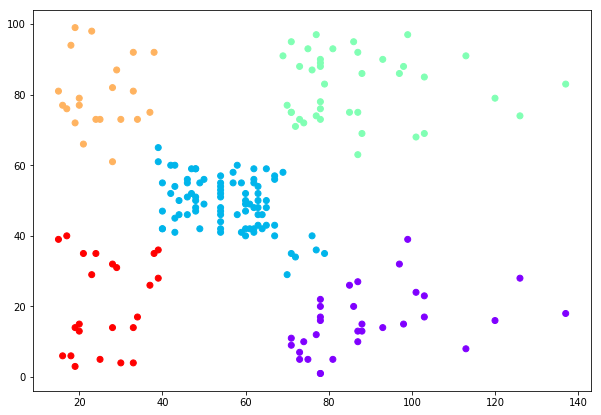

In [20]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')  